# Discretization:
It is the process of transforming continous variables into discrete variables by creating a set of contigous intervals. Discretization is also called binning, where bin is an alternative name for interval.

<hr>

# Why use Discretization?
* To handle Outliers.
* It helps to smooth out noise in the data.
* To improve the shape of the data.

<hr>

# Types of Discretization(Binning):
* Equal width Binning/Uniform Binning
* Equal Frequency/Quantile Binning
* K-Means Binning

# Equal Width Binning/Uniform Binning:
* The range of the data is divided into bins of equal size. Each bin has the same width.
* No change in spread of the data.
* Outliers are compressed in the bin.
  
<i>Formula: </i>

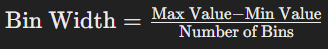

### Using encoding as Ordinal Encoding

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# If you have a 1D array (a list or array of values) and you want to convert it into a 2D column vector, you can use reshape(-1, 1).
# The -1 tells NumPy to calculate the number of rows needed to accommodate all the elements in the array, given that there will be exactly 1 column.
df = np.array([2, 5, 8, 10, 12, 18, 20, 24, 27, 30]).reshape(-1, 1)
df = pd.DataFrame(df, columns = ['Value'])
df

Value
0      2
1      5
2      8
3     10
4     12
5     18
6     20
7     24
8     27
9     30

In [2]:
# Initialize KBinsDiscretizer for equal-width binning
kbins = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'uniform', subsample = None)

In [3]:
# Fit and transform the data
df['Bin'] = kbins.fit_transform(df)
df

Value  Bin
0      2  0.0
1      5  0.0
2      8  0.0
3     10  0.0
4     12  1.0
5     18  1.0
6     20  1.0
7     24  2.0
8     27  2.0
9     30  2.0

In [4]:
# Creating new column Bin_Label custom labels to bins
df['Bin_label'] = df['Bin'].map({0: 'Low', 1: 'Medium', 2: 'High'})
df

Value  Bin Bin_label
0      2  0.0       Low
1      5  0.0       Low
2      8  0.0       Low
3     10  0.0       Low
4     12  1.0    Medium
5     18  1.0    Medium
6     20  1.0    Medium
7     24  2.0      High
8     27  2.0      High
9     30  2.0      High

### Using encoding as OneHotEncoding

<i>--> Lets say we divided the data into 3 equal bins:</i>
* Bin 1: [2, 5, 8]
* Bin 2: [10, 12, 18]
* Bin 3: [20, 24, 27, 30]

<i>--> Convert bin assignments into one-hot encoded vectors:</i>
* Value 2 falls into Bin 1 → [1, 0, 0]
* Value 5 falls into Bin 1 → [1, 0, 0]
* Value 8 falls into Bin 1 → [1, 0, 0]
* Value 10 falls into Bin 2 → [0, 1, 0]
* Value 12 falls into Bin 2 → [0, 1, 0]
* Value 18 falls into Bin 2 → [0, 1, 0]
* Value 20 falls into Bin 3 → [0, 0, 1]
* Value 24 falls into Bin 3 → [0, 0, 1]
* Value 27 falls into Bin 3 → [0, 0, 1]
* Value 30 falls into Bin 3 → [0, 0, 1]

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer


df = np.array([2, 5, 8, 10, 12, 18, 20, 24, 27, 30]).reshape(-1, 1)
df = pd.DataFrame(df, columns = ['Value'])
df

Value
0      2
1      5
2      8
3     10
4     12
5     18
6     20
7     24
8     27
9     30

In [6]:
# Initialize KBinsDiscretizer for quantile binning
kbins = KBinsDiscretizer(n_bins = 3, encode = 'onehot', strategy = 'uniform', subsample = None)

In [7]:
df_u_binned = kbins.fit_transform(df).toarray()
df_u_binned

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [8]:
df_u_binned = kbins.fit_transform(df)
df_u_binned = pd.DataFrame(df_u_binned.toarray(), columns = ['Bin_1', 'Bin_2', 'Bin_3'])
data_original = df
df_trf = np.hstack([data_original, df_u_binned])
df_trf = pd.DataFrame(df_trf, columns = ['Value', 'Bin 1', 'Bin 2', 'Bin 3'])
df_trf

Value  Bin 1  Bin 2  Bin 3
0    2.0    1.0    0.0    0.0
1    5.0    1.0    0.0    0.0
2    8.0    1.0    0.0    0.0
3   10.0    1.0    0.0    0.0
4   12.0    0.0    1.0    0.0
5   18.0    0.0    1.0    0.0
6   20.0    0.0    1.0    0.0
7   24.0    0.0    0.0    1.0
8   27.0    0.0    0.0    1.0
9   30.0    0.0    0.0    1.0

# Equal Frequency Binning/Quantile Binning:
* It is a method of dividing data into bins such that each bin contains approximately the same number of observations. This type of binning is particularly useful when you want to ensure that each bin has a balanced representation of data points.

<hr>

<i>--> Steps for Equal-Frequency Binning:</i>
1. Sort the Data: Arrange the data in ascending order.
2. Determine the Number of Bins (N): Decide how many bins you want to create.
3. Calculate the Number of Data Points per Bin:

   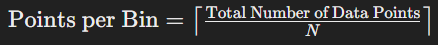
4. Assign Data Points to Bins: Assign the sorted data points to bins so that each bin has approximately the same number of data points. If the data doesn't divide evenly, some bins may have one more or one fewer data point.

<hr>

<i>--> Example:</i>

Let’s work through an example with the following dataset: [2, 5, 8, 10, 12, 18, 20, 24, 27, 30]
1. Sort the Data (already sorted in this case): [2,5,8,10,12,18,20,24,27,30]
2. Determine the Number of Bins: Let’s say we want to create 3 bins.
3. Calculate the Number of Data Points per Bin:

   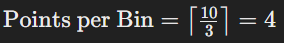
   
   This means each bin will have approximately 4 data points.
4. Assign Data Points to Bins:
    * Bin 1: [2, 5, 8, 10]
    * Bin 2: [12, 18, 20, 24]
    * Bin 3: [27, 30]

<b>Note: Equal Frequency/Quantile Binning is used more frequently</b>

### Using encoding as Ordinal Encoding

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

df = np.array([2, 5, 8, 10, 12, 18, 20, 24, 27, 30]).reshape(-1, 1)
df = pd.DataFrame(df, columns = ['Value'])
df

Value
0      2
1      5
2      8
3     10
4     12
5     18
6     20
7     24
8     27
9     30

In [10]:
kbins = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'quantile', subsample = None)

In [11]:
df['Bin'] = kbins.fit_transform(df)
df

Value  Bin
0      2  0.0
1      5  0.0
2      8  1.0
3     10  1.0
4     12  2.0
5     18  2.0
6     20  3.0
7     24  3.0
8     27  4.0
9     30  4.0

### Using encoding as OneHotEncoding

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

df = np.array([2, 5, 8, 10, 12, 18, 20, 24, 27, 30]).reshape(-1, 1)
df = pd.DataFrame(df, columns = ['Value'])
df

Value
0      2
1      5
2      8
3     10
4     12
5     18
6     20
7     24
8     27
9     30

In [13]:
kbins = KBinsDiscretizer(n_bins = 5, encode = 'onehot', strategy = 'quantile', subsample = None)

In [14]:
df_q_binned = kbins.fit_transform(df)
df_q_binned = pd.DataFrame(df_q_binned.toarray(), columns = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5'])
df_q_binned

Bin 1  Bin 2  Bin 3  Bin 4  Bin 5
0    1.0    0.0    0.0    0.0    0.0
1    1.0    0.0    0.0    0.0    0.0
2    0.0    1.0    0.0    0.0    0.0
3    0.0    1.0    0.0    0.0    0.0
4    0.0    0.0    1.0    0.0    0.0
5    0.0    0.0    1.0    0.0    0.0
6    0.0    0.0    0.0    1.0    0.0
7    0.0    0.0    0.0    1.0    0.0
8    0.0    0.0    0.0    0.0    1.0
9    0.0    0.0    0.0    0.0    1.0

In [15]:
df_trf = np.hstack([df, df_q_binned])
df_trf = pd.DataFrame(df_trf, columns = ['Value', 'Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5'])
df_trf

Value  Bin 1  Bin 2  Bin 3  Bin 4  Bin 5
0    2.0    1.0    0.0    0.0    0.0    0.0
1    5.0    1.0    0.0    0.0    0.0    0.0
2    8.0    0.0    1.0    0.0    0.0    0.0
3   10.0    0.0    1.0    0.0    0.0    0.0
4   12.0    0.0    0.0    1.0    0.0    0.0
5   18.0    0.0    0.0    1.0    0.0    0.0
6   20.0    0.0    0.0    0.0    1.0    0.0
7   24.0    0.0    0.0    0.0    1.0    0.0
8   27.0    0.0    0.0    0.0    0.0    1.0
9   30.0    0.0    0.0    0.0    0.0    1.0